# # Badanie rożnych funkcji  aktywacyjnych 

In [8]:
import import_ipynb
import basic_create_model_function as al
import tensorflow.keras as keras
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd


Co to jest funckja aktywacyjna? 
* Jest to równania matematyczne, które określają wyjście pojedynczego neurona,które przyjmuje normalizowane wartości od zakresu od 1 do 0 lub od -1 do 1. 
* Każdy neuron ma wagę, a pomnożenie liczby wejściowej przez wagę daje wynik neuronu, który jest przenoszony do następnej warstwy.


Informacje ogolne o badanym modelu:
* Badanym przez nas siec neuronowa to siec gesta (Dense), ktory każdy neuron jest połaczyn z każdym neuronem z kolejne warstwy wiec każdy neuron jest zawsze aktywowany.
* W deep learning wykorzystuje się funkcje nie liniowe ,ponieważ dla funkcji liniowych nie ma znaczenia ilość warst (zawsze i tak jest jedna warstwa).

W badaniu zajmie sie nastepny funkcja aktywacyjnych, ktore znajdują się w biblotece Keras:
* relu
* sigmoid 
* softplus 
* softsing 
* tanh 
* selu 
* elu
* swish



In [9]:
list_activaton_function =   [ tf.nn.relu,tf.nn.sigmoid,tf.nn.softplus, tf.nn.softsign,tf.nn.tanh, tf.nn.selu, tf.nn.elu, tf.nn.swish ]
name_activation_function =  ['relu','sigmoid','softplus','softsing','tanh','selu','elu','swish']

In [10]:
df = pd.DataFrame(columns=['activation', 'val_loss', 'val_acc', 'loss', 'acc', 'trains_time'])


# urchomienia modelu dla każdego activation  10 krotnie
index = 0
for i  in range(10):
    index_name = 0
    for activation in list_activaton_function :
        
        val_loss, val_acc, loss, acc, trains_time, model = al.create_model_with_history_for_all_epochs(activation= list_activaton_function[1])
        
        ls = [name_activation_function[index_name],val_loss[-1], val_acc[-1], loss[-1], acc[-1], sum(trains_time)]
        
        df.loc[index] = ls

        index += 1 
        index_name += 1 

df

313/313 [==============================] - 0s 770us/step - loss: 0.1581 - accuracy: 0.9534
Trenuję: 
313/313 [==============================] - 0s 865us/step - loss: 0.1551 - accuracy: 0.9531
Trenuję: 
313/313 [==============================] - 0s 780us/step - loss: 0.1569 - accuracy: 0.9528
Trenuję: 
313/313 [==============================] - 0s 778us/step - loss: 0.1553 - accuracy: 0.9517
Trenuję: 
313/313 [==============================] - 0s 822us/step - loss: 0.1463 - accuracy: 0.9546
Trenuję: 
313/313 [==============================] - 0s 773us/step - loss: 0.1656 - accuracy: 0.9482
Trenuję: 
313/313 [==============================] - 0s 793us/step - loss: 0.1523 - accuracy: 0.9540
Trenuję: 
313/313 [==============================] - 0s 780us/step - loss: 0.1567 - accuracy: 0.9522
Trenuję: 
313/313 [==============================] - 0s 767us/step - loss: 0.1522 - accuracy: 0.9520
Trenuję: 
313/313 [==============================] - 0s 796us/step - loss: 0.1570 - accuracy: 0.9521


,activation,val_loss,val_acc,loss,acc,trains_time
0,relu,0.147918,0.9542,0.162028,0.951167,5.797830
1,sigmoid,0.152047,0.9540,0.165081,0.950800,6.654206
2,softplus,0.151371,0.9545,0.166093,0.949933,7.510955
3,softsing,0.147790,0.9546,0.162095,0.952133,7.472779
4,tanh,0.158905,0.9525,0.167693,0.949933,7.459931
...,...,...,...,...,...,...
75,softsing,0.148201,0.9550,0.163190,0.951200,7.631584
76,tanh,0.158388,0.9509,0.165531,0.950267,7.675319
77,selu,0.146049,0.9531,0.162500,0.951450,7.668787
78,elu,0.155477,0.9538,0.164126,0.950633,7.686731


In [11]:
df_mean = df.groupby(by='activation').mean().reset_index()
df_mean

,activation,val_loss,val_acc,loss,acc,trains_time
0,elu,0.152586,0.95288,0.164297,0.950935,7.727168
1,relu,0.153652,0.95273,0.164394,0.950675,7.435604
2,selu,0.152481,0.95317,0.163798,0.950830,7.834203
3,sigmoid,0.150927,0.95401,0.164577,0.950825,7.573808
4,softplus,0.154276,0.95295,0.165455,0.950332,7.632756
5,softsing,0.151667,0.95362,0.164671,0.950893,7.627961
6,swish,0.154189,0.95306,0.164527,0.950842,7.650893
7,tanh,0.154179,0.95296,0.165399,0.950355,7.720595


Jak widać z tabelki wyżej funkcje aktywujace mają bardzo zbliszone wyniki (róznica jest na trzecie cyfrze znaczącej) oprocz dla trains_time.
Dlatego uznałem, że jedyny atrybutem, którego ma sensu porównywąć funkcje aktywujace jest czas traningu.


Text(0.5, 0, 'trains_time')

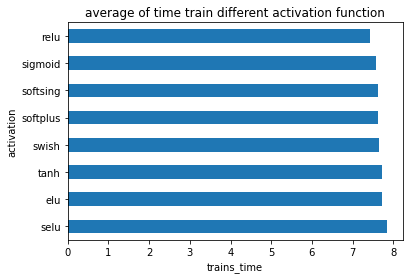

In [12]:

ax = df_mean.sort_values(by=['trains_time'],ascending=False).plot.barh(stacked=True,title = 'average of time train different activation function', x='activation', y='trains_time',legend=False)
ax.set_ylabel("activation")
ax.set_xlabel("trains_time")

Z wykresu wyżej wynika, ze mimalnie najkrótszy czas wykonania ma funkcja relu, która możemy uznać za najlepszą funkcje dla naszego modelu. Jednakże, czas treniowanie jest bardzo slabo metryką, poniewąż zależy ona bardzo od pracy procesora, nawet na 10-krotnej proby. Również metryka loss, która mowi nam o efektywności uczenia jest prawie taka sama dla wszytkich funkcji aktywujących. Zatem, nie ma znaczenia w naszym modelu jaką funkcje aktywującą wybierzemy.
